# Scipy


## Funções para integração 

O módulo __integrate__ oferece diversas funções para calcular integrais. A primeira delas é a função __quad__, que permite computar uma integral definida de uma variável:

In [4]:
from scipy.integrate import quad

x2 = lambda x: x**2
integral = quad(x2, 0, 2)
print('resultado: {}, erro: {}'.format(integral[0], integral[1]))

resultado: 2.666666666666667, erro: 2.960594732333751e-14


In [6]:
import numpy as np

def normal_fdp(x, mu, sigma_2):
    return np.exp(-(x - mu) ** 2 / (2 * sigma_2)) / np.sqrt(2 * np.pi * sigma_2)

standard_fdp = lambda x: normal_fdp(x, 0, 1)
integral = quad(standard_fdp, -3, 3)
print('P(-3 < X < 3): {}, erro: {}'.format(integral[0], integral[1]))

P(-3 < X < 3): 0.9973002039367399, erro: 1.1072256488739329e-14


Para computar integrais duplas, triplas e sobre múltiplas variáveis, o módulo oferece respectivamente as funções dblquad, tplquad e nquad.

## Funções para interporlação

Para interpolar funções 1D, o ódulo interpolate possui a função interp1d. Essa função é chamada com dois vetores x e y e retorna uma função que pode ser chamda para usar interpolação e encontrar novos valores de y para novos valores de x.

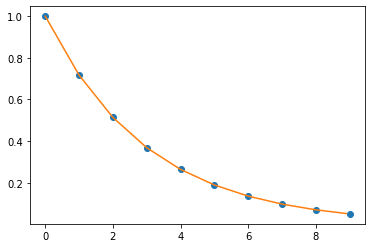

In [8]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.arange(0, 10)
y = np.exp(-x / 3.0)
f = interp1d(x, y)

x_new = np.arange(0, 9, 0.1)
y_new = f(x_new)
plt.plot(x, y, 'o', x_new, y_new, '-')
plt.show()

## Funções Espaciais

O módulo spatial contém diversas funções para calcular distâncias, realizar transformações espaciais, encontrar envólucros convexos, etc. As mais de 20 funções de distâncias são encontradas no submódulo spatial.distance e incluem distâncias entre vetores e entre linhas de matrizes. A função pdist permite calcular as distâncias par-a-par entre as linhas de uma matriz X:

In [11]:
from scipy.spatial.distance import pdist

X = np.arange(12).reshape(4, 3)
print(X)
print(pdist(X))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[ 5.19615242 10.39230485 15.58845727  5.19615242 10.39230485  5.19615242]


O retorno da função pdist é uma matriz condensada na forma de um vetor, para economizar espaço. A ideia é que a matriz de distâncias original tem diagonal 0 e valores espelhados. Para recuperar a matriz quadrada original, pode-se usar a função squareform:

In [13]:
from scipy.spatial.distance import squareform

print(squareform(pdist(X)))

[[ 0.          5.19615242 10.39230485 15.58845727]
 [ 5.19615242  0.          5.19615242 10.39230485]
 [10.39230485  5.19615242  0.          5.19615242]
 [15.58845727 10.39230485  5.19615242  0.        ]]


A função pdist permite escolher a métrica de distância utilizada, tendo a distância Euclidiana como padrão. Por exemplo, para se calcular a distância Euclidiana quadrática, pode-se fazer:

In [16]:
print(squareform(pdist(X, metric='sqeuclidean')))

[[  0.  27. 108. 243.]
 [ 27.   0.  27. 108.]
 [108.  27.   0.  27.]
 [243. 108.  27.   0.]]


Para calcular as distâncias entre as linhas de uma matriz  A  e as de uma matriz  B , usa-se a função cdist, que, assim como a função pdist, permite escolher a métrica.

In [19]:
from scipy.spatial.distance import cdist

A = np.arange(30).reshape(10, 3)
B = np.random.random((4, 3))

print(A)
print()
print(B)
print()
print(cdist(A, B, metric='cityblock'))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]]

[[0.43702014 0.51396155 0.64895313]
 [0.68624643 0.02084059 0.65149661]
 [0.18397449 0.26180928 0.72634864]
 [0.52309202 0.80492053 0.65898785]]

[[ 2.27410547  3.01390923  2.19581657  2.05918364]
 [10.40006518 10.64141637 10.82786759 10.01299961]
 [19.40006518 19.64141637 19.82786759 19.01299961]
 [28.40006518 28.64141637 28.82786759 28.01299961]
 [37.40006518 37.64141637 37.82786759 37.01299961]
 [46.40006518 46.64141637 46.82786759 46.01299961]
 [55.40006518 55.64141637 55.82786759 55.01299961]
 [64.40006518 64.64141637 64.82786759 64.01299961]
 [73.40006518 73.64141637 73.82786759 73.01299961]
 [82.40006518 82.64141637 82.82786759 82.01299961]]


## Funções de otimização

O módulo optimize oferece funções para minimização ou maximização de funções objetivo, com a possibilidade de forçar restrições. A principal função desse módulo é a minimize, que precisa receber como parâmetros uma função que será minimizada e uma solução inicial. Outros parâmetros incluem argumentos extras para a função minimizada, o método de minimização escolhido (padrão BFGS), possíveis restrições, uma função para calcular a Hessiana, um parâmetro e tolerância para critério de parada, entre outros.

In [22]:
from scipy.optimize import minimize

f = lambda x: x ** 2
x0 = 10

res = minimize(f, x0)
print(res.x)


[-4.14270251e-08]


In [23]:
x0 = 1
res = minimize(f, x0)
print(res.x)

[-7.45036449e-09]


In [29]:
x0 = 10
bounds = [(0, None)]

res = minimize(f, x0, bounds=bounds)
print(res.x)

[2.88291837e-15]


In [27]:
x0 = 1
bounds = [(0, None)]

res = minimize(f, x0, bounds=bounds)
print(res.x)

[0.]


A função minimize pode ser usada para estimar modelos. Por exemplo, vamos usá-la para estimar um modelo de regressão linear:

In [36]:
np.random.seed(42)
X = np.random.random(1000)
y = 3 * X + 2 + np.random.normal(size=1000)

betas = np.random.normal(size=2)

sq_err = lambda b, x, y: np.mean(((x*b[1] + b[0]) - y) ** 2)

res = minimize(sq_err, betas, args=(X, y))
print(res.x)

[2.17478032 2.84521493]


**Exercicio**

In [66]:
import numpy as np
np.random.seed(42)

p = 3
n = 10000
X = np.random.random((n,p))
coef = np.random.randint(5, size = (p + 1, 1))

print('originais: {}'.format(coef))

y = X @ coef[1:] + coef[0] + np.random.normal(size = (n, 1))

betas = np.random.random(size = (p+1, 1))

sq_err = lambda b, x, y: np.mean(((x @ b[1:] + b[0]).reshape(-1, 1) - y)**(2))

res = minimize(sq_err, betas, args = (X,y))
print(res.x)

originais: [[4]
 [2]
 [0]
 [4]]
[ 3.97460971  2.0133879  -0.01191115  4.06997395]


array([2.53052561, 2.54256004])